In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re
import ast 
import torch

In [2]:
def val_extractor(file_name1, file_name2, file_name3):    
    
    # seed 1
    seed1_test = list()
    seed1_spar = list()
    seed1_sele = list()
    
    with open(file_name1) as fi:
        for i, line in enumerate(fi):
            if (i) % 6 == 0:
                line = ast.literal_eval(line)
                seed1_test.append(line[-1])
                
    with open(file_name1) as fi:
        for i, line in enumerate(fi):
            if (i - 1) % 6 == 0:
                sparsity_list = re.findall("\d+\.\d+", line)
                sparsity_list = str(sparsity_list)
                sparsity_list = sparsity_list.replace("'", "")
                sparsity_list = ast.literal_eval(sparsity_list)
                if not sparsity_list:
                    seed1_spar.append(0)
                else:
                    seed1_spar.append(sparsity_list[-1])
                
    for i, element in enumerate(seed1_spar):
        if not 0 <= element <= 1:
            seed1_spar[i] = 0
    
    with open(file_name1) as fi:
        for i, line in enumerate(fi):
            if (i - 3) % 6 == 0:
                selectivity_average = ast.literal_eval(line)
                seed1_sele.append(selectivity_average)
                
    # seed 100           
    seed2_test = list()
    seed2_spar = list()
    seed2_sele = list()
    
    with open(file_name2) as fi:
        for i, line in enumerate(fi):
            if (i) % 6 == 0:
                line = ast.literal_eval(line)
                seed2_test.append(line[-1])
                
    with open(file_name2) as fi:
        for i, line in enumerate(fi):
            if (i - 1) % 6 == 0:
                sparsity_list = re.findall("\d+\.\d+", line)
                sparsity_list = str(sparsity_list)
                sparsity_list = sparsity_list.replace("'", "")
                sparsity_list = ast.literal_eval(sparsity_list)
                if not sparsity_list:
                    seed2_spar.append(0)
                else:
                    seed2_spar.append(sparsity_list[-1])
                
    for i, element in enumerate(seed2_spar):
        if not 0 <= element <= 1:
            seed2_spar[i] = 0
    
    with open(file_name2) as fi:
        for i, line in enumerate(fi):
            if (i - 3) % 6 == 0:
                selectivity_average = ast.literal_eval(line)
                seed2_sele.append(selectivity_average)
                
                
    # seed 1234
    seed3_test = list()
    seed3_spar = list()
    seed3_sele = list()
    
    with open(file_name3) as fi:
        for i, line in enumerate(fi):
            if (i) % 6 == 0:
                line = ast.literal_eval(line)
                seed3_test.append(line[-1])
                
    with open(file_name3) as fi:
        for i, line in enumerate(fi):
            if (i - 1) % 6 == 0:
                sparsity_list = re.findall("\d+\.\d+", line)
                sparsity_list = str(sparsity_list)
                sparsity_list = sparsity_list.replace("'", "")
                sparsity_list = ast.literal_eval(sparsity_list)
                if not sparsity_list:
                    seed3_spar.append(0)
                else:
                    seed3_spar.append(sparsity_list[-1])
                
    for i, element in enumerate(seed3_spar):
        if not 0 <= element <= 1:
            seed3_spar[i] = 0
    
    with open(file_name3) as fi:
        for i, line in enumerate(fi):
            if (i - 3) % 6 == 0:
                selectivity_average = ast.literal_eval(line)
                seed3_sele.append(selectivity_average)
                
    acc_avg = list()
    acc_se  = list()

    spar_avg = list()
    spar_se  = list()

    selec_avg = list()
    selec_se  = list()

    for i in range(len(seed1_test)):
        acc_avg.append(np.mean([seed1_test[i], seed2_test[i], seed3_test[i]]))
        acc_se .append(np.std ([seed1_test[i], seed2_test[i], seed3_test[i]]) / np.sqrt(3))

        spar_avg.append(np.mean([seed1_spar[i], seed2_spar[i], seed3_spar[i]]))
        spar_se .append(np.std ([seed1_spar[i], seed2_spar[i], seed3_spar[i]]) / np.sqrt(3))

        selec_avg.append(np.mean([seed1_sele[i], seed2_sele[i], seed3_sele[i]]))
        selec_se .append(np.std ([seed1_sele[i], seed2_sele[i], seed3_sele[i]]) / np.sqrt(3))
    
    return acc_avg, acc_se, spar_avg, spar_se, selec_avg, selec_se

In [3]:
# learning rate

In [4]:
sgd_acc_avg, sgd_acc_se, sgd_spa_avg, sgd_spa_se, sgd_sel_avg, sgd_sel_se = val_extractor('seed1/SGD/seed1_sparsity_selectivity_SGD_learning_rate.txt',                       'seed100/SGD/seed100_sparsity_selectivity_SGD_learning_rate.txt',            'seed1234/SGD/seed1234_sparsity_selectivity_SGD_learning_rate.txt')
grad_acc_avg, grad_acc_se, grad_spa_avg, grad_spa_se, grad_sel_avg, grad_sel_se = val_extractor('seed1/Adagrad/seed1_sparsity_selectivity_Adagrad_learning_rate.txt',         'seed100/Adagrad/seed100_sparsity_selectivity_Adagrad_learning_rate.txt',    'seed1234/Adagrad/seed1234_sparsity_selectivity_Adagrad_learning_rate.txt')
delta_acc_avg, delta_acc_se, delta_spa_avg, delta_spa_se, delta_sel_avg, delta_sel_se = val_extractor('seed1/Adadelta/seed1_sparsity_selectivity_Adadelta_learning_rate.txt', 'seed100/Adadelta/seed100_sparsity_selectivity_Adadelta_learning_rate.txt',  'seed1234/Adadelta/seed1234_sparsity_selectivity_Adadelta_learning_rate.txt')
adam_acc_avg, adam_acc_se, adam_spa_avg, adam_spa_se, adam_sel_avg, adam_sel_se = val_extractor('seed1/Adam/seed1_sparsity_selectivity_Adam_learning_rate.txt',               'seed100/Adam/seed100_sparsity_selectivity_Adam_learning_rate.txt',          'seed1234/Adam/seed1234_sparsity_selectivity_Adam_learning_rate.txt')

In [5]:
rho_list = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.999]
betas_lhs = [0.0001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.999]
betas_rhs = [0.0001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.999]
learning_rate = np.logspace(-5, 3, 15)
weight_decay = np.logspace(-5, 1, 11)
momentum = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.999]

In [6]:
learning_rate[:-4]

array([1.00000000e-05, 3.72759372e-05, 1.38949549e-04, 5.17947468e-04,
       1.93069773e-03, 7.19685673e-03, 2.68269580e-02, 1.00000000e-01,
       3.72759372e-01, 1.38949549e+00, 5.17947468e+00])

[]

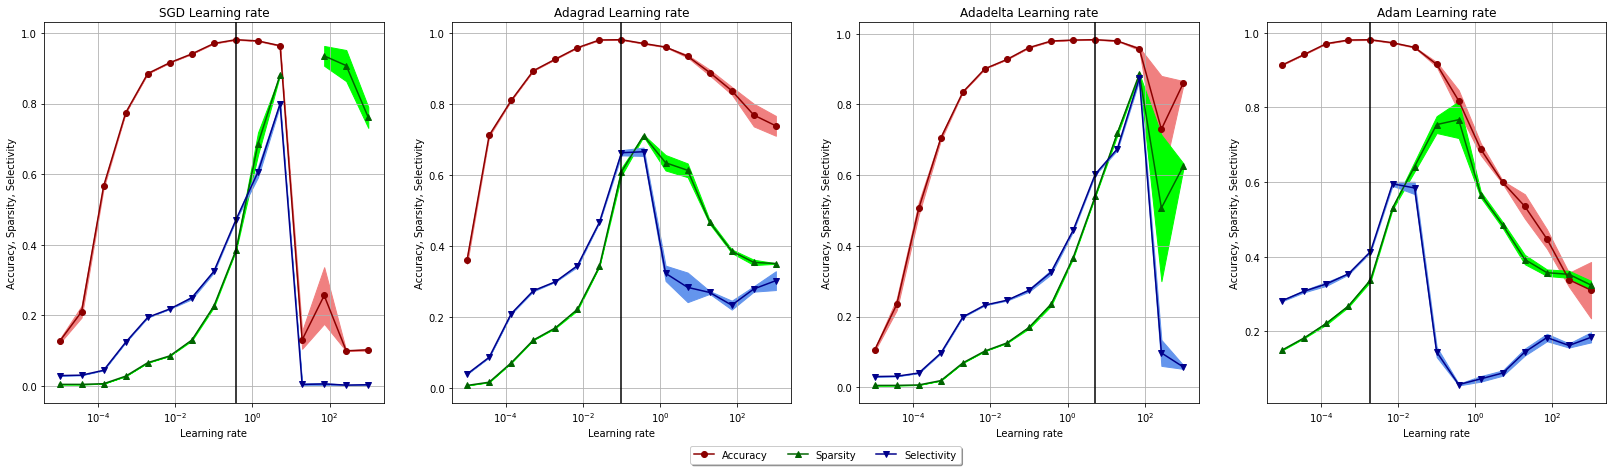

In [7]:
fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(1, 4, figsize=(28 ,7))

ax1.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')
ax4.set_xscale('log')

ax1.plot(learning_rate, sgd_acc_avg, color='darkred', marker='o', label='Accuracy')
ax1.fill_between(learning_rate, np.subtract(sgd_acc_avg, sgd_acc_se), np.add(sgd_acc_avg, sgd_acc_se), color='lightcoral')

ax1.plot(learning_rate[:-4], sgd_spa_avg[:-4], color='darkgreen', marker='^', label='Sparsity')
ax1.fill_between(learning_rate[:-4], np.subtract(sgd_spa_avg[:-4], sgd_spa_se[:-4]), np.add(sgd_spa_avg[:-4], sgd_spa_se[:-4]), color='lime')

ax1.plot(learning_rate[-3:], sgd_spa_avg[-3:], color='darkgreen', marker='^', label='Sparsity')
ax1.fill_between(learning_rate[-3:], np.subtract(sgd_spa_avg[-3:], sgd_spa_se[-3:]), np.add(sgd_spa_avg[-3:], sgd_spa_se[-3:]), color='lime')

ax1.plot(learning_rate, sgd_sel_avg, color='darkblue', marker='v', label='Selectivity')
ax1.fill_between(learning_rate, np.subtract(sgd_sel_avg, sgd_sel_se), np.add(sgd_sel_avg, sgd_sel_se), color='cornflowerblue')

ax1.set_xlabel('Learning rate')
ax1.set_ylabel('Accuracy, Sparsity, Selectivity')
ax1.set_title('SGD Learning rate')
ax1.grid()

ax2.plot(learning_rate, grad_acc_avg, color='darkred', marker='o', label='Accuracy')
ax2.fill_between(learning_rate, np.subtract(grad_acc_avg, grad_acc_se), np.add(grad_acc_avg, grad_acc_se), color='lightcoral')

ax2.plot(learning_rate, grad_spa_avg, color='darkgreen', marker='^', label='Sparsity')
ax2.fill_between(learning_rate, np.subtract(grad_spa_avg, grad_spa_se), np.add(grad_spa_avg, grad_spa_se), color='lime')

ax2.plot(learning_rate, grad_sel_avg, color='darkblue', marker='v', label='Selectivity')
ax2.fill_between(learning_rate, np.subtract(grad_sel_avg, grad_sel_se), np.add(grad_sel_avg, grad_sel_se), color='cornflowerblue')

ax2.set_xlabel('Learning rate')
ax2.set_ylabel('Accuracy, Sparsity, Selectivity')
ax2.set_title('Adagrad Learning rate')
ax2.grid()

ax3.plot(learning_rate, delta_acc_avg, color='darkred', marker='o', label='Accuracy')
ax3.fill_between(learning_rate, np.subtract(delta_acc_avg, delta_acc_se), np.add(delta_acc_avg, delta_acc_se), color='lightcoral')

ax3.plot(learning_rate, delta_spa_avg, color='darkgreen', marker='^', label='Sparsity')
ax3.fill_between(learning_rate, np.subtract(delta_spa_avg, delta_spa_se), np.add(delta_spa_avg, delta_spa_se), color='lime')

ax3.plot(learning_rate, delta_sel_avg, color='darkblue', marker='v', label='Selectivity')
ax3.fill_between(learning_rate, np.subtract(delta_sel_avg, delta_sel_se), np.add(delta_sel_avg, delta_sel_se), color='cornflowerblue')

ax3.set_xlabel('Learning rate')
ax3.set_ylabel('Accuracy, Sparsity, Selectivity')
ax3.set_title('Adadelta Learning rate')
ax3.grid()

ax4.plot(learning_rate, adam_acc_avg, color='darkred', marker='o', label='Accuracy')
ax4.fill_between(learning_rate, np.subtract(adam_acc_avg, adam_acc_se), np.add(adam_acc_avg, adam_acc_se), color='lightcoral')

ax4.plot(learning_rate, adam_spa_avg, color='darkgreen', marker='^', label='Sparsity')
ax4.fill_between(learning_rate, np.subtract(adam_spa_avg, adam_spa_se), np.add(adam_spa_avg, adam_spa_se), color='lime')

ax4.plot(learning_rate, adam_sel_avg, color='darkblue', marker='v', label='Selectivity')
ax4.fill_between(learning_rate, np.subtract(adam_sel_avg, adam_sel_se), np.add(adam_sel_avg, adam_sel_se), color='cornflowerblue')

ax4.set_xlabel('Learning rate')
ax4.set_ylabel('Accuracy, Sparsity, Selectivity')
ax4.set_title('Adam Learning rate')
ax4.grid()
ax4.legend(loc='upper center', bbox_to_anchor=(-1.3, -0.1),
          fancybox=True, shadow=True, ncol=3)


ax1.axvline(x=learning_rate[np.argmax(sgd_acc_avg)], color='black')
ax2.axvline(x=learning_rate[np.argmax(grad_acc_avg)], color='black')
ax3.axvline(x=learning_rate[np.argmax(delta_acc_avg)], color='black')
ax4.axvline(x=learning_rate[np.argmax(adam_acc_avg)], color='black')

plt.plot()

In [9]:
# weight decay

In [10]:
sgd_acc_avg, sgd_acc_se, sgd_spa_avg, sgd_spa_se, sgd_sel_avg, sgd_sel_se = val_extractor('seed1/SGD/seed1_sparsity_selectivity_SGD_weight_decay.txt',                       'seed100/SGD/seed100_sparsity_selectivity_SGD_weight_decay.txt',            'seed1234/SGD/seed1234_sparsity_selectivity_SGD_weight_decay.txt')
grad_acc_avg, grad_acc_se, grad_spa_avg, grad_spa_se, grad_sel_avg, grad_sel_se = val_extractor('seed1/Adagrad/seed1_sparsity_selectivity_Adagrad_weight_decay.txt',         'seed100/Adagrad/seed100_sparsity_selectivity_Adagrad_weight_decay.txt',    'seed1234/Adagrad/seed1234_sparsity_selectivity_Adagrad_weight_decay.txt')
delta_acc_avg, delta_acc_se, delta_spa_avg, delta_spa_se, delta_sel_avg, delta_sel_se = val_extractor('seed1/Adadelta/seed1_sparsity_selectivity_Adadelta_weight_decay.txt', 'seed100/Adadelta/seed100_sparsity_selectivity_Adadelta_weight_decay.txt',  'seed1234/Adadelta/seed1234_sparsity_selectivity_Adadelta_weight_decay.txt')
adam_acc_avg, adam_acc_se, adam_spa_avg, adam_spa_se, adam_sel_avg, adam_sel_se = val_extractor('seed1/Adam/seed1_sparsity_selectivity_Adam_weight_decay.txt',               'seed100/Adam/seed100_sparsity_selectivity_Adam_weight_decay.txt',          'seed1234/Adam/seed1234_sparsity_selectivity_Adam_weight_decay.txt')

[]

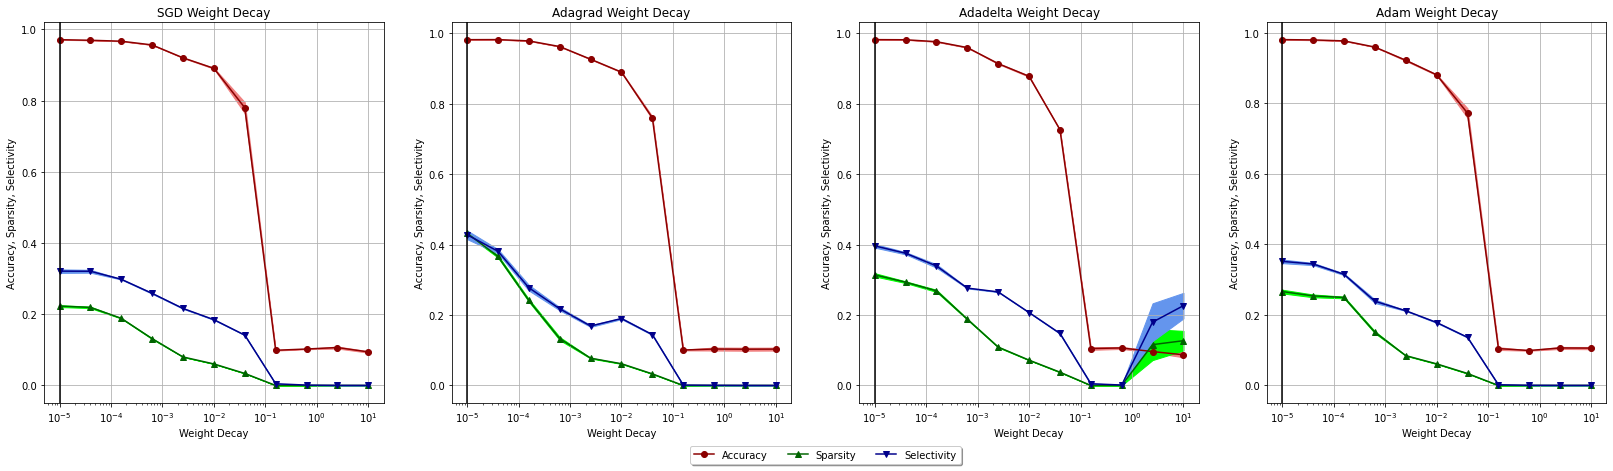

In [11]:
fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(1, 4, figsize=(28 ,7))

ax1.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')
ax4.set_xscale('log')

ax1.plot(weight_decay, sgd_acc_avg, color='darkred', marker='o', label='Accuracy')
ax1.fill_between(weight_decay, np.subtract(sgd_acc_avg, sgd_acc_se), np.add(sgd_acc_avg, sgd_acc_se), color='lightcoral')

ax1.plot(weight_decay, sgd_spa_avg, color='darkgreen', marker='^', label='Sparsity')
ax1.fill_between(weight_decay, np.subtract(sgd_spa_avg, sgd_spa_se), np.add(sgd_spa_avg, sgd_spa_se), color='lime')

ax1.plot(weight_decay, sgd_sel_avg, color='darkblue', marker='v', label='Selectivity')
ax1.fill_between(weight_decay, np.subtract(sgd_sel_avg, sgd_sel_se), np.add(sgd_sel_avg, sgd_sel_se), color='cornflowerblue')

ax1.set_xlabel('Weight Decay')
ax1.set_ylabel('Accuracy, Sparsity, Selectivity')
ax1.set_title('SGD Weight Decay')
ax1.grid()

ax2.plot(weight_decay, grad_acc_avg, color='darkred', marker='o', label='Accuracy')
ax2.fill_between(weight_decay, np.subtract(grad_acc_avg, grad_acc_se), np.add(grad_acc_avg, grad_acc_se), color='lightcoral')

ax2.plot(weight_decay, grad_spa_avg, color='darkgreen', marker='^', label='Sparsity')
ax2.fill_between(weight_decay, np.subtract(grad_spa_avg, grad_spa_se), np.add(grad_spa_avg, grad_spa_se), color='lime')

ax2.plot(weight_decay, grad_sel_avg, color='darkblue', marker='v', label='Selectivity')
ax2.fill_between(weight_decay, np.subtract(grad_sel_avg, grad_sel_se), np.add(grad_sel_avg, grad_sel_se), color='cornflowerblue')

ax2.set_xlabel('Weight Decay')
ax2.set_ylabel('Accuracy, Sparsity, Selectivity')
ax2.set_title('Adagrad Weight Decay')
ax2.grid()

ax3.plot(weight_decay, delta_acc_avg, color='darkred', marker='o', label='Accuracy')
ax3.fill_between(weight_decay, np.subtract(delta_acc_avg, delta_acc_se), np.add(delta_acc_avg, delta_acc_se), color='lightcoral')

ax3.plot(weight_decay, delta_spa_avg, color='darkgreen', marker='^', label='Sparsity')
ax3.fill_between(weight_decay, np.subtract(delta_spa_avg, delta_spa_se), np.add(delta_spa_avg, delta_spa_se), color='lime')

ax3.plot(weight_decay, delta_sel_avg, color='darkblue', marker='v', label='Selectivity')
ax3.fill_between(weight_decay, np.subtract(delta_sel_avg, delta_sel_se), np.add(delta_sel_avg, delta_sel_se), color='cornflowerblue')

ax3.set_xlabel('Weight Decay')
ax3.set_ylabel('Accuracy, Sparsity, Selectivity')
ax3.set_title('Adadelta Weight Decay')
ax3.grid()

ax4.plot(weight_decay, adam_acc_avg, color='darkred', marker='o', label='Accuracy')
ax4.fill_between(weight_decay, np.subtract(adam_acc_avg, adam_acc_se), np.add(adam_acc_avg, adam_acc_se), color='lightcoral')

ax4.plot(weight_decay, adam_spa_avg, color='darkgreen', marker='^', label='Sparsity')
ax4.fill_between(weight_decay, np.subtract(adam_spa_avg, adam_spa_se), np.add(adam_spa_avg, adam_spa_se), color='lime')

ax4.plot(weight_decay, adam_sel_avg, color='darkblue', marker='v', label='Selectivity')
ax4.fill_between(weight_decay, np.subtract(adam_sel_avg, adam_sel_se), np.add(adam_sel_avg, adam_sel_se), color='cornflowerblue')

ax4.set_xlabel('Weight Decay')
ax4.set_ylabel('Accuracy, Sparsity, Selectivity')
ax4.set_title('Adam Weight Decay')
ax4.grid()

ax4.legend(loc='upper center', bbox_to_anchor=(-1.3, -0.1),
          fancybox=True, shadow=True, ncol=3)

ax1.axvline(x=1e-5, color='black')
ax2.axvline(x=1e-5, color='black')
ax3.axvline(x=1e-5, color='black')
ax4.axvline(x=1e-5, color='black')

plt.plot()

In [12]:
sgd_acc_avg,      sgd_acc_se,      sgd_spa_avg,      sgd_spa_se,      sgd_sel_avg,      sgd_sel_se = val_extractor('seed1/SGD/seed1_sparsity_selectivity_SGD_momentum.txt',                       'seed100/SGD/seed100_sparsity_selectivity_SGD_momentum.txt',            'seed1234/SGD/seed1234_sparsity_selectivity_SGD_momentum.txt')

delta_acc_avg,    delta_acc_se,    delta_spa_avg,    delta_spa_se,    delta_sel_avg,    delta_sel_se = val_extractor('seed1/Adadelta/seed1_sparsity_selectivity_Adadelta_rho.txt', 'seed100/Adadelta/seed100_sparsity_selectivity_Adadelta_rho.txt',  'seed1234/Adadelta/seed1234_sparsity_selectivity_Adadelta_rho.txt')

lhs_adam_acc_avg, lhs_adam_acc_se, lhs_adam_spa_avg, lhs_adam_spa_se, lhs_adam_sel_avg, lhs_adam_sel_se = val_extractor('seed1/Adam/seed1_sparsity_selectivity_Adam_betas_lhs.txt',               'seed100/Adam/seed100_sparsity_selectivity_Adam_betas_lhs.txt',          'seed1234/Adam/seed1234_sparsity_selectivity_Adam_betas_lhs.txt')

rhs_adam_acc_avg, rhs_adam_acc_se, rhs_adam_spa_avg, rhs_adam_spa_se, rhs_adam_sel_avg, rhs_adam_sel_se = val_extractor('seed1/Adam/seed1_sparsity_selectivity_Adam_betas_rhs.txt',               'seed100/Adam/seed100_sparsity_selectivity_Adam_betas_rhs.txt',          'seed1234/Adam/seed1234_sparsity_selectivity_Adam_betas_rhs.txt')

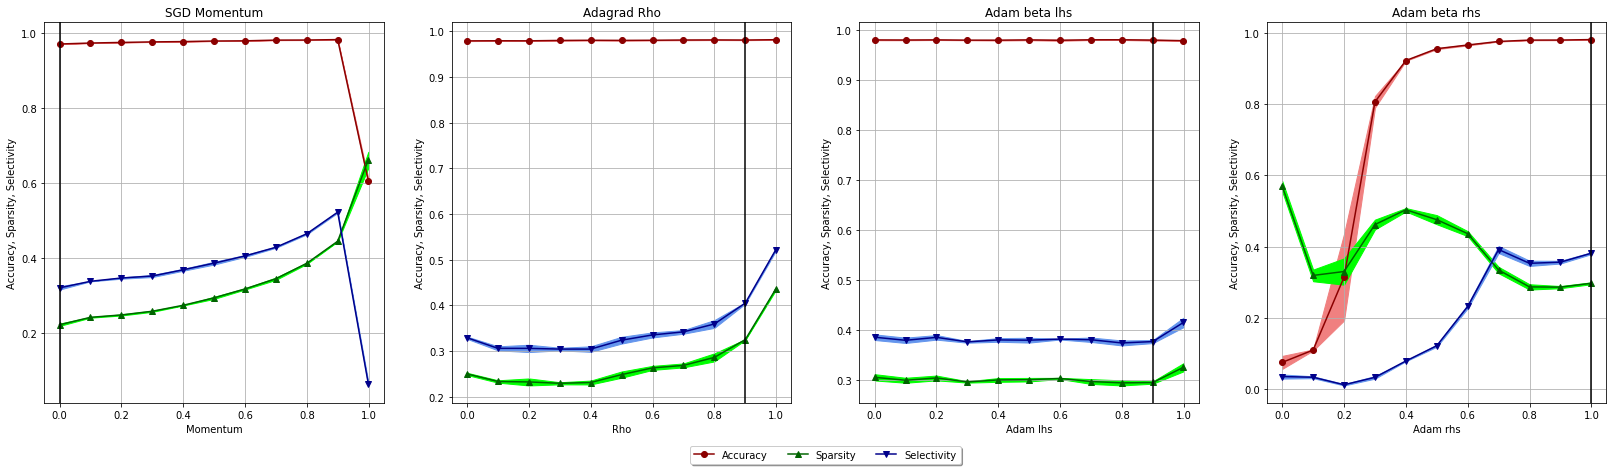

In [13]:
fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(1, 4, figsize=(28 ,7))

ax1.plot(momentum, sgd_acc_avg, color='darkred', marker='o', label='Accuracy')
ax1.fill_between(momentum, np.subtract(sgd_acc_avg, sgd_acc_se), np.add(sgd_acc_avg, sgd_acc_se), color='lightcoral')

ax1.plot(momentum, sgd_spa_avg, color='darkgreen', marker='^', label='Sparsity')
ax1.fill_between(momentum, np.subtract(sgd_spa_avg, sgd_spa_se), np.add(sgd_spa_avg, sgd_spa_se), color='lime')

ax1.plot(momentum, sgd_sel_avg, color='darkblue', marker='v', label='Selectivity')
ax1.fill_between(momentum, np.subtract(sgd_sel_avg, sgd_sel_se), np.add(sgd_sel_avg, sgd_sel_se), color='cornflowerblue')

ax1.set_xlabel('Momentum')
ax1.set_ylabel('Accuracy, Sparsity, Selectivity')
ax1.set_title('SGD Momentum')
ax1.grid()

# Adadelta rho
ax2.plot(rho_list, delta_acc_avg, color='darkred', marker='o', label='Accuracy')
ax2.fill_between(rho_list, np.subtract(delta_acc_avg, delta_acc_se), np.add(delta_acc_avg, delta_acc_se), color='lightcoral')

ax2.plot(rho_list, delta_spa_avg, color='darkgreen', marker='^', label='Sparsity')
ax2.fill_between(rho_list, np.subtract(delta_spa_avg, delta_spa_se), np.add(delta_spa_avg, delta_spa_se), color='lime')

ax2.plot(rho_list, delta_sel_avg, color='darkblue', marker='v', label='Selectivity')
ax2.fill_between(rho_list, np.subtract(delta_sel_avg, delta_sel_se), np.add(delta_sel_avg, delta_sel_se), color='cornflowerblue')

ax2.set_xlabel('Rho')
ax2.set_ylabel('Accuracy, Sparsity, Selectivity')
ax2.set_title('Adagrad Rho')
ax2.grid()

# Adam rhs 
ax3.plot(betas_lhs, lhs_adam_acc_avg, color='darkred', marker='o', label='Accuracy')
ax3.fill_between(betas_lhs, np.subtract(lhs_adam_acc_avg, lhs_adam_acc_se), np.add(lhs_adam_acc_avg, lhs_adam_acc_se), color='lightcoral')

ax3.plot(betas_lhs, lhs_adam_spa_avg, color='darkgreen', marker='^', label='Sparsity')
ax3.fill_between(betas_lhs, np.subtract(lhs_adam_spa_avg, lhs_adam_spa_se), np.add(lhs_adam_spa_avg, lhs_adam_spa_se), color='lime')

ax3.plot(betas_lhs, lhs_adam_sel_avg, color='darkblue', marker='v', label='Selectivity')
ax3.fill_between(betas_lhs, np.subtract(lhs_adam_sel_avg, lhs_adam_sel_se), np.add(lhs_adam_sel_avg, lhs_adam_sel_se), color='cornflowerblue')

ax3.set_xlabel('Adam lhs')
ax3.set_ylabel('Accuracy, Sparsity, Selectivity')
ax3.set_title('Adam beta lhs')
ax3.grid()

# Adam rhs 
ax4.plot(betas_rhs, rhs_adam_acc_avg, color='darkred', marker='o', label='Accuracy')
ax4.fill_between(betas_rhs, np.subtract(rhs_adam_acc_avg, rhs_adam_acc_se), np.add(rhs_adam_acc_avg, rhs_adam_acc_se), color='lightcoral')

ax4.plot(betas_rhs, rhs_adam_spa_avg, color='darkgreen', marker='^', label='Sparsity')
ax4.fill_between(betas_rhs, np.subtract(rhs_adam_spa_avg, rhs_adam_spa_se), np.add(rhs_adam_spa_avg, rhs_adam_spa_se), color='lime')

ax4.plot(betas_rhs, rhs_adam_sel_avg, color='darkblue', marker='v', label='Selectivity')
ax4.fill_between(betas_rhs, np.subtract(rhs_adam_sel_avg, rhs_adam_sel_se), np.add(rhs_adam_sel_avg, rhs_adam_sel_se), color='cornflowerblue')

ax4.legend(loc='upper center', bbox_to_anchor=(-1.3, -0.1),
          fancybox=True, shadow=True, ncol=3)

ax4.set_xlabel('Adam rhs')
ax4.set_ylabel('Accuracy, Sparsity, Selectivity')
ax4.set_title('Adam beta rhs')
ax4.grid()

ax1.axvline(x=0, color='black')
ax2.axvline(x=0.9, color='black')
ax3.axvline(x=0.9, color='black')
ax4.axvline(x=0.999, color='black')

